<a href="https://colab.research.google.com/github/luifer991/machine_learning_and_projects/blob/main/predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-01-31 17:20:26--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2023-01-31 17:20:27 (4.44 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
# Convert categorical columns into numeric
CATEGORICAL_COLUMNS = ['sex', 'smoker', 'region']

for column in CATEGORICAL_COLUMNS:
  dataset[column] = dataset[column].astype('category').cat.codes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dataset, test_dataset = np.split(dataset, [int(.8 * len(dataset))])
train_labels, test_labels = train_dataset.pop('expenses'), test_dataset.pop('expenses')

In [ ]:
normalizer = layers.experimental.preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_dataset))

In [ ]:
# Create model
model = keras.Sequential([
                          normalizer,
                          layers.Dense(2),
                          layers.Dense(1)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1),
              loss='mae',
              metrics=['mae', 'mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 6)                13        
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 2)                 14        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 30
Trainable params: 17
Non-trainable params: 13
_________________________________________________________________


In [ ]:
# Train model
model.fit(train_dataset, train_labels, epochs=100, validation_split=0.2)

Epoch 1/100
27/27 [==============================] - 1s 11ms/step - loss: 13193.3633 - mae: 13193.3633 - mse: 320420480.0000 - val_loss: 13241.6211 - val_mae: 13241.6211 - val_mse: 313668416.0000
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 13147.3984 - mae: 13147.3984 - mse: 319280160.0000 - val_loss: 13169.1084 - val_mae: 13169.1084 - val_mse: 311796736.0000
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 13038.1895 - mae: 13038.1895 - mse: 316468128.0000 - val_loss: 13026.4287 - val_mae: 13026.4287 - val_mse: 308299680.0000
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 12852.1436 - mae: 12852.1436 - mse: 311789024.0000 - val_loss: 12807.0811 - val_mae: 12807.0811 - val_mse: 302542336.0000
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 12584.2568 - mae: 12584.2568 - mse: 305143680.0000 - val_loss: 12507.4385 - val_mae: 12507.4385 - val_mse: 295268768.0000
Epoch 6/100
27/27 [=====

9/9 - 0s - loss: 3481.9202 - mae: 3481.9202 - mse: 47592088.0000 - 49ms/epoch - 5ms/step
Testing set Mean Abs Error: 3481.92 expenses
The predictions are correct
9/9 [==============================] - 0s 3ms/step


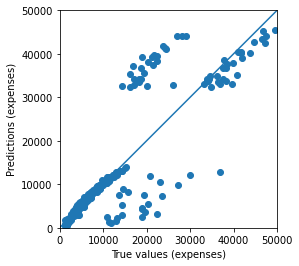

In [ ]:
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("The predictions are correct")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
